<a href="https://colab.research.google.com/github/wasimfaim/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'> <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

## <b><u> Project Description </u></b>

## <b> Buisness Context </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. **The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), Total hours bikes rented for, holiday, Functional day and date information.</b>


### <b>Attribute Information: </b>

* ### Date : Date
* ### Hour - Total hours rented for
* ### Temperature-Temperature of the day
* ### Humidity - Humidity measure
* ### Windspeed - windspeed
* ### Visibility - Visibility measure
* ### Dew point temperature - Dew point temperature measure
* ### Solar radiation - Solar radiation measure
* ### Rainfall - Rainfall in mm
* ### Snowfall - Snowfall measure
* ### Seasons - Season name
* ### Holiday - Holiday or not
* ### Functional Day - Function day or not

## <b> Main Libraries to be used </b>

In [1]:
# Pandas for data aggregation
import pandas as pd

# Matplotlib and seaborn for visualisation and behaviour with respect to the target variable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# NumPy forcomputationally efficient operations
import numpy as np

from datetime import datetime
import datetime as dt

# Scikit Learn for model training, model optimization and metrics calculation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

## <b/> Mount the Drive and import the SeoulBikeData </b>

In [2]:
# Let's mount the google drive for importing the Seoul Bike Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the given seol bike data set from drive
seoul_bike_df=pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction - Wasim Ahmad/Data/SeoulBikeData.csv', encoding = 'unicode_escape')

* In Python, Unicode is defined as a string type for representing the characters that allow the Python program to work with any type of different possible characters. For example, any path of the directory or any link address as a string. When we use such a string as a parameter to any function, there is a possibility of the occurrence of an error. Such error is known as Unicode error in Python. We get such an error because any character after the Unicode escape sequence (“ \u ”) produces an error 

## <b> Let's Deep Dive in the data </b>

* To know about the data we need to check its shape, rows and columns, information, description etc

In [4]:
# Let's check the shape of the Seoul Bike Data
seoul_bike_df.shape

(8760, 14)

* Seoul bike data has 8760 rows and 14 columns

In [5]:
# Let's check the first five rows of the Seoul Bike Data
seoul_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Let's check the last five rows of the Seoul Bike Data
seoul_bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Let's check the culumns or features of the Seoul Bike Data
seoul_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# Let's check the information of the Seoul Bike Data
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Let's check the number of unique values for each column of the Seoul Bike Data
seoul_bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [10]:
# Let's check the description of the Seoul Bike Data
seoul_bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# We can check the description of the Seoul Bike Data in a different way too
seoul_bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


* **This Dataset contains 8760 rows and 14 columns.**
* This Data contain the record of 1 year from 1-12-2017 to 30-11-2018
* In a day we have 24 hours and 365 days in a year so 365*24 = 8760, which represents the number of rows or line in the given dataset. 

 **Now Let's talk about fetures of Seoul Bike Data**

**We have 14 Features in our Seoul Bike Data**

* **Date** : This column contains the date of the day given from 01/12/2017 to 30/11/2018 its data type is object, we need to convert this into *datetime* format for further exploration.

* **Rented Bike Count** : This columns contains Number of rented bikes per hour which is our dependent variable and we will predict it and Its data type is in *int* format.

* **Hour**: The hour of the day, starting from 0-23 its data type is *int*, we need to convert it into category data type format.

* **Temperature(°C)**: Temperature of weather in Celsius its data type is *Float* . There is no need to change.

* **Humidity(%)**: This column has Humidity in the air in % its data type is *int*. There is also no need to change.

* **Wind speed (m/s)** : Speed of the wind given in this column in m/s. Its data type is *Float* There is no need to change.

* **Visibility (10m)**: It contains Visibility in m and its data type is *int*

* **Dew point temperature(°C)**: Temperature at the beggining of the day its data type is *Float*

* **Solar Radiation (MJ/m2)**: Solar radiation outside  its data type is *Float*

* **Rainfall(mm)**: Rainfall in mm its data type is *Float*

* **Snowfall (cm)**: Amount of snowfall in cm its data type is *Float*

* **Seasons**: This columns has Season of the year (ie. summer, winter, autumn, rain ) its data type is *str*. 

* **Holiday**:  It consist the two category of data that is holiday and no holiday If the day is holiday period or not.


* **Functioning Day**:  It also consist the two category of data that If the day is a Functioning Day or not and the type is  object data type having yes and no.



## <b> Let's prepare the DATA </b>

Before applying further exploration we need to check-
  
* * Missing values
* * Duplicate values
* * Outlier detection etc. 

Duplicate or missing values may give an incorrect view of the overall statistics of data. Duplication just means that you have repeated data in your dataset.


Outliers and inconsistent data points often tend to disturb the model’s overall learning, leading to false predictions.


 This could be due to things like data entry errors or data collection methods. By following above steps in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.

* As we have seen from info that data set has 8760 rows and each column has 8760 non-null values so we can say that there is no null values but still we can recheck-

In [12]:
# Let's check the null values in the Seoul Bike Data
seoul_bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **As stated above there is no missing value present**

* Now Let's check for duplicate values in dataset

In [13]:
# Let's checking for duplicate values of seoul bike data
seoul_bike_df[seoul_bike_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


* There is no missing and duplicate values.

* But in the real-world data often has a lot of missing values. This cause the data corruption or failure to record data. The handling of missing or duplicate data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. 

* Here Some of the column names in the dataset has special charechter and clumsy so for our ease let's make it simple  and it will not affect our end results.

In [14]:
# Rename the complex columns name
seoul_bike_df = seoul_bike_df.rename(columns={'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity', 'Wind speed (m/s)':'Wind speed',
                                           'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew point temperature',
                                            'Solar Radiation (MJ/m2)':'Solar Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'})

In [15]:
# Let's see the renamed columns
seoul_bike_df.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### **Need to Break the Date column**

* As we are about to analyze data, we need to analyze on the basis of day (weekend days) ie. saturday and sunday beacuse most of the offices closed on saturday and sunday.
* There are columns such as seasons, rainnfall and snowfall etc. so we need to analyze the data on the basis of month also.
* So we need to convert Date column into datetime format then we split it into three column i.e 'year', 'month', 'day' as a category data type 

In [16]:
# Changing the "Date" column into three "year","month","day" column
seoul_bike_df['Date'] = seoul_bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

* Now our seoul_bike_df "date" column has changed to datetime64[ns] type

In [17]:
# Let's seprate
seoul_bike_df['year'] = seoul_bike_df['Date'].dt.year
seoul_bike_df['month'] = seoul_bike_df['Date'].dt.month

# As we want know the day is weekend or not, so create the day name  
seoul_bike_df['day'] = seoul_bike_df['Date'].dt.day_name()

* We changed the "date" column into three different column  "year", "month" and "day" respectively.


In [18]:
# Let's see the added columns
seoul_bike_df.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [19]:
# Now let's find the weekend days saturday and sunday
seoul_bike_df['Weekend'] = seoul_bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)

* As we will focus mainly on months and weekend days so we can drop rest of the column
* We have already converted "Date" column in to three columns so we can drop this column
* The "year" column in our data set has only two year value  2017 and 2018, consider this is a one year so we can drop the "year" column.
* The other column is "day". It has the details of the each day for each month, so for our relevence we don't need each day of each month data but we need the weekend data. if a day is a weekday or a weekend so we can convert it into this format and let's drop the "day" column.

In [20]:
# As mentioned above Let's Drop the column "Date","day","year"
seoul_bike_df = seoul_bike_df.drop(columns = ['Date', 'day', 'year'], axis = 1)

In [21]:
# We can check the modified data
seoul_bike_df.head(2)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [22]:
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  Weekend                8760 non-null   int64  
dtypes: f

* As *Hour, month and Weekend* column are of integer data type but these are  categorical in nature here. 
* **Hour** shows 24 hours of a day 
* **Month** shows 12 month of a year  
* **Weekend** shows either the day is weekend days or not 

* So we need to change its data type if we don't change then, while doing the further anlysis there may high correletion between features with our end result may affect.

In [23]:
# Change the data type of 'Hour','month','Weekend' column into catagory column
seoul_bike_df['Hour'] = seoul_bike_df['Hour'].astype('category')
seoul_bike_df['month'] = seoul_bike_df['month'].astype('category')
seoul_bike_df['Weekend'] = seoul_bike_df['Weekend'].astype('category')

In [24]:
# Let's check the data types
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented Bike Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew point temperature  8760 non-null   float64 
 7   Solar Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  Weekend                8760 non-null   c

## <font color = 'blue'> <b> Let's do some Visualisation now </b>

* Now We will analyze the data to find the patterns of the data.
* We will analyze our dependent variable 'Rented Bike Count' also.
* Let's start visualistion through different plots
* * The plot ensures that every important feature of the data is in place to make sense to the reader and keep the story moving. 
* * Like we use  Bar charts when we want to show segments of information. Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes etc.
* * The important use of line graph is to track the changes over the short and long period of time. It is also used to compare the changes over the same period of time for different groups.

#### **Demand for rented bikes during different Hours of the day**

[Text(0.5, 1.0, 'Plot between Count of Rented bikes versus Hour ')]

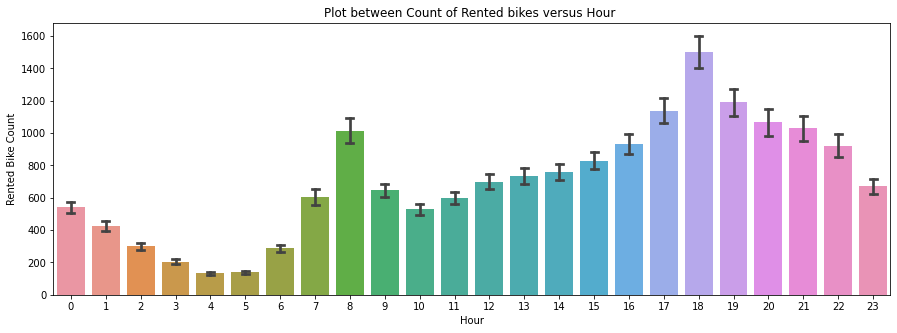

In [25]:
# Visualisation of Rented bikes versus Hour
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=seoul_bike_df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Plot between Count of Rented bikes versus Hour ')

* We can say from the above plot that the demand of rented bikes are high during the working hours from 7am to 9am in the morning and 5pm to 7pm in the evening throughout the year.
* People used to go and return from their work so the demand is higher during these hours.
* It is high on 8am and 6pm in the mornig and evening respectively

#### **Demand for rented bikes during Weekend days**

[Text(0.5, 1.0, 'Plot between Count of Rented bikes versus hour during Weekend and normal days')]

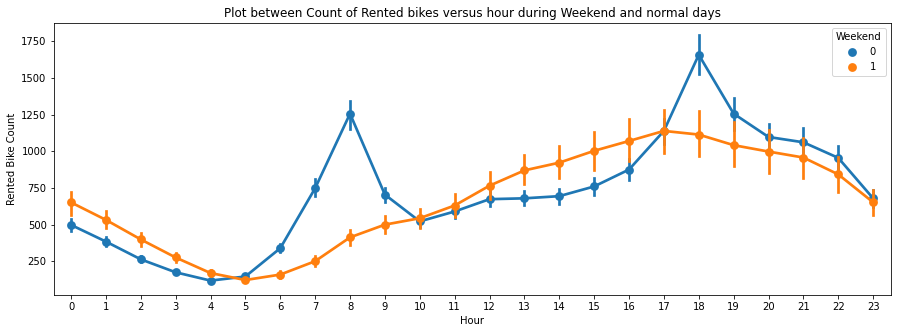

In [26]:
# Visuaualisation between Count of Rented bikes versus hour during Weekend and normal days
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(data=seoul_bike_df,x='Hour',y='Rented Bike Count',hue='Weekend',ax=ax)
ax.set(title='Plot between Count of Rented bikes versus hour during Weekend and normal days')

* The orange and blue colour represents the weekend (saturday or sunday) days and non weeekend days respectively.
* On **normal working days** the demand of rented bikes are high between morning (7 am to 9 am) and evening (5 pm to 7 pm) . It shows the office opening and colsing time the demand is higher.
* On **weekend days** the demand of rented bike is very low specially in the morning hour but it increases gradually and after 5 pm decreases as well.


[Text(0.5, 1.0, 'Plot between Count of Rented bikes versus weekend days')]

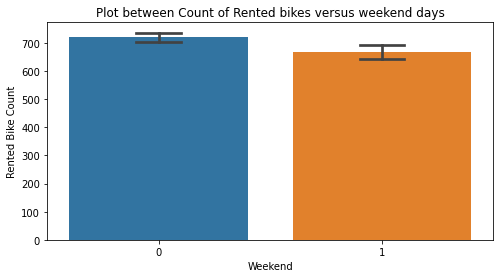

In [27]:
# Visualisation between Rented bikes versus weekend days
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=seoul_bike_df,x='Weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Plot between Count of Rented bikes versus weekend days')

* As the offices and most working places are closed on the weekend days so from the above bar plot we can say that during weekend days the demand of the rented bike is lower.

#### **Demand for rented bikes during Months of a year**

[Text(0.5, 1.0, 'Plot between Count of Rented bikes versus Month ')]

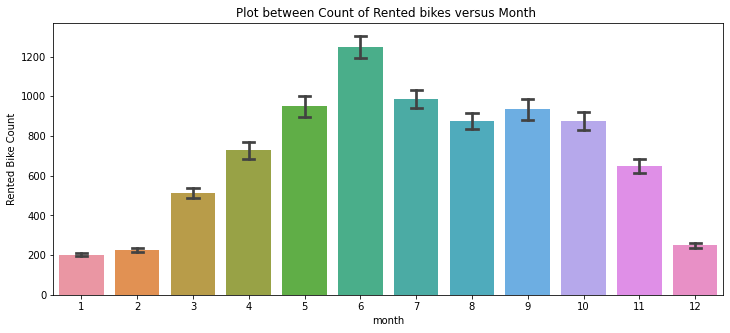

In [28]:
# Visualisation between Count of Rented bikes versus Month
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(data=seoul_bike_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Plot between Count of Rented bikes versus Month ')

* This bar plot clearly shows that from  the month 5 (May) to 10 (October), during summer season the demand of the rented bike is high as compare to other months.
* In the month of June the demand of rented bike is highest.

#### **Demand for rented bikes during different Seasons**

[Text(0.5, 1.0, 'Demand for Rented bikes during different seasons')]

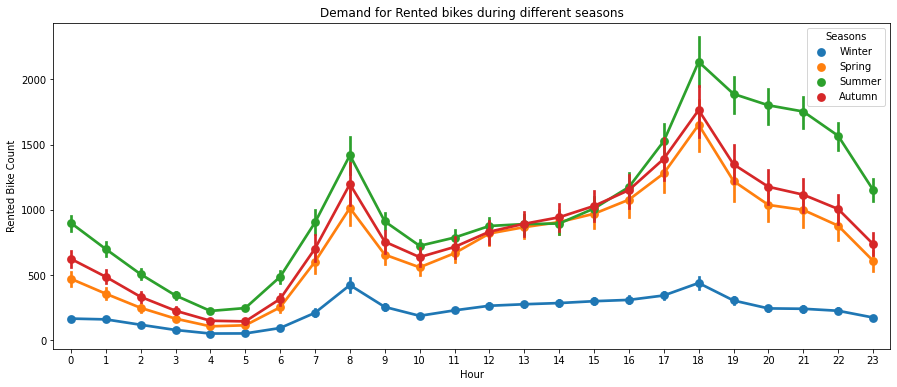

In [29]:
# Visualisation of Rented bikes during different seasons
fig,ax=plt.subplots(figsize=(15,6))
sns.pointplot(data=seoul_bike_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Demand for Rented bikes during different seasons')

[Text(0.5, 1.0, 'Demand for Rented bikes acording to Seasons ')]

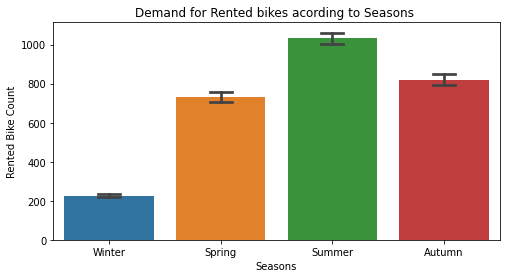

In [30]:
# Visualisation Rented bikes during differnt Seasons
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=seoul_bike_df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Demand for Rented bikes acording to Seasons ')

* We can say from above point and bar plots that the use of rented bikes in four different seasons are as follows:
* * The demand of rented bikes is comparatively very low in **winter season**, we may say so due to snowfall.
* * In the **spring season** the demand for rented bikes is comparatively higher than winter season.
* * In the **autumn season** the use of rented bikes is higher than the spring seasons.
* * In the **summer season** the use of rented bikes is highest among all seasons.
* **In every season the demand has a peak at 7am-9am and 5pm-7pm**



#### **Demand for rented bikes during Holidays**

[Text(0.5, 1.0, 'Hourly Demand for Rented bikes during Holiday or No Holiday ')]

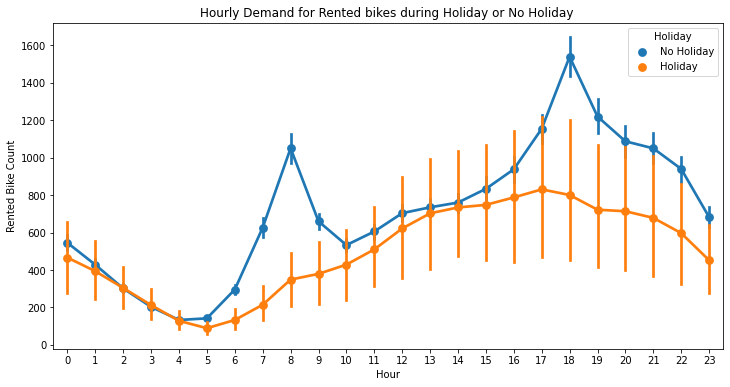

In [31]:
# Visualisation rented bikes acording to Holiday
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=seoul_bike_df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Hourly Demand for Rented bikes during Holiday or No Holiday ')

[Text(0.5, 1.0, ' Rented bikes demand during Holidays ')]

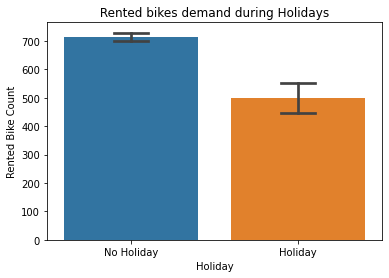

In [32]:
# Visualisation of Rented bikes acording to Holiday
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=seoul_bike_df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title=' Rented bikes demand during Holidays ')

* The demand for rented bikes starts from 5am and increases gradually till 5pm then again decreases gradually till 5am during holidays.
* Most people use rented bikes in the evening on holidays.
* When there is no holiday the demand of rented bikes are comparatively higher and has a peak at 7am-9am and 5pm-7pm



#### **Demand for rented bieks during Functioning Days**




[Text(0.5, 1.0, 'Hourly demand for Rented bike during Functioning Days ')]

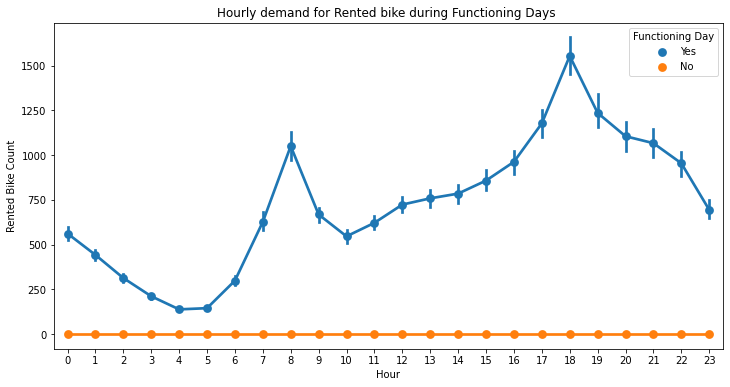

In [33]:
# Vsualisation of Rented bikes versus Functioning Day
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=seoul_bike_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Hourly demand for Rented bike during Functioning Days ')

[Text(0.5, 1.0, 'Demand for Rented bikes acording to Functioning Day ')]

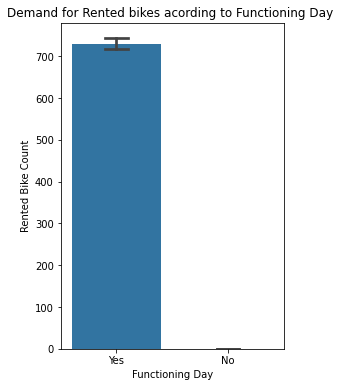

In [34]:
# Visualisation of Rented bikes acording to Functioning Day
fig,ax=plt.subplots(figsize=(4,6))
sns.barplot(data=seoul_bike_df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Demand for Rented bikes acording to Functioning Day ')

* Above bar and point plot clearly shows that the demand for rented bikes is only on functioning days Peoples don't use rented bikes on non functioning days. 


#### **Demand for rented bieks during different Weather condition**


* **Its human tendency that we find comfort zones for our daily routine and travelling as well, We have seen this from above visualisation so far and we will see here also like temperature, humidity, visibility, Rain and snow fall etc**



##### **Outside Temperature**

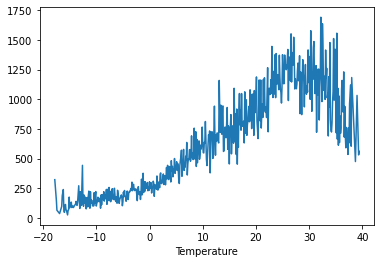

In [35]:
# Visualisation of relationship between "Rented Bike Count" and "Temperature" 
seoul_bike_df.groupby('Temperature').mean()['Rented Bike Count'].plot()

* Here we can say that demand for the rented bikes is high when the temperature is around 25°C.


##### **Wind speed**


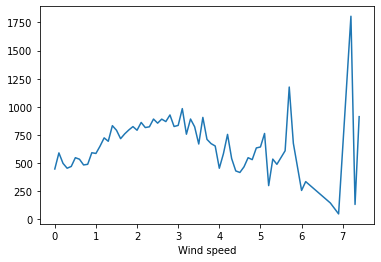

In [36]:
# Visualisation of relationship between "No. of Rented Bike" and "Wind speed" 
seoul_bike_df.groupby('Wind speed').mean()['Rented Bike Count'].plot()

* Above plot shows that the demand for rented bikes is uniformly distributed and there is pea in demand when wind speed is 7 m/s.


##### **Humidity**


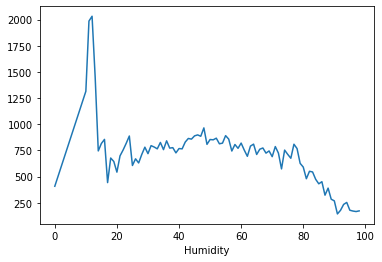

In [37]:
# Visualisation of relationship between "Rented Bike Count" and "Humidity" 
seoul_bike_df.groupby('Humidity').mean()['Rented Bike Count'].plot()

* Above plot shows that the demand for rented bikes is high when the humidity of air is 10 to 15%.


##### **Visibility**


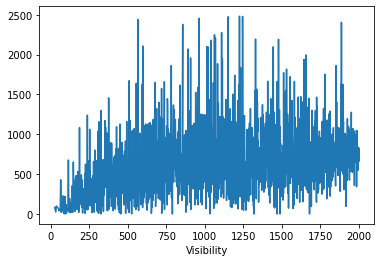

In [38]:
# Visualisation of relationship between "Rented Bike Count" and "Visibility" 
seoul_bike_df.groupby('Visibility').mean()['Rented Bike Count'].plot()

* From the above plot we can say that visibility is very high at some points, otherwise it is almost uniformly distributed.

##### **Dew point Temperature**


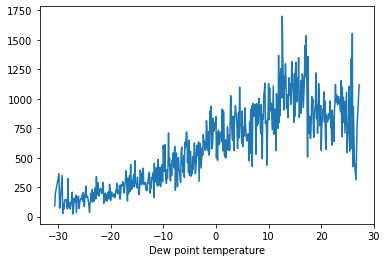

In [39]:
# Visualisation of relationship between "Rented Bike Count" and "Dew point temperature" 
seoul_bike_df.groupby('Dew point temperature').mean()['Rented Bike Count'].plot()

* Above plot shows that the demand is high when Dew point temperature is around 15°C. Its plot is almost the same as the temperature plot (we can see in the above plot of temperature)


##### **Rainfall**


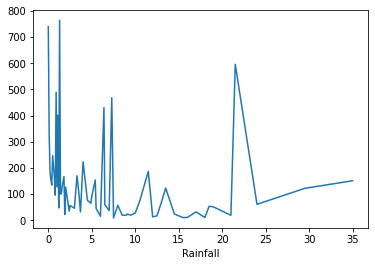

In [40]:
# Visualisation of relationship between "Demand for Rented Bike" and "Rainfall" 
seoul_bike_df.groupby('Rainfall').mean()['Rented Bike Count'].plot()

* Above plot shows that the demand for rented bikes is high when there is no or very less rain. And when it rains a lot the demand for rented bikes is not decreasing, here for example even if we have around 22 mm of rain there is a big peak of rented bikes


##### **Snowfall**


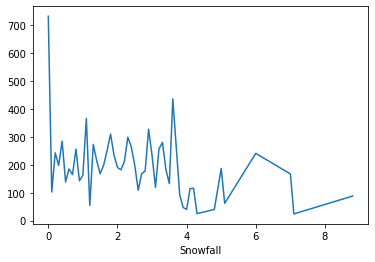

In [41]:
# Visualisation of relationship between "Demand for Rented Bike" and "Snowfall" 
seoul_bike_df.groupby('Snowfall').mean()['Rented Bike Count'].plot()

* We can see from the above plot that the number of rented bikes is high when there is no snowfall and it is very low When there is more than 4 cm of snowfall.


##### **Solar Radiation**


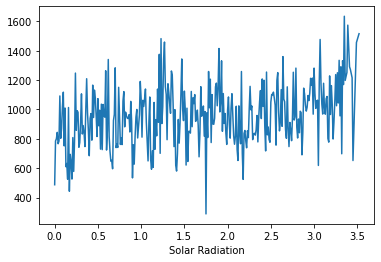

In [42]:
# Visualisation of relationship between "Demand for Rented Bike" and "Solar Radiation" 
seoul_bike_df.groupby('Solar Radiation').mean()['Rented Bike Count'].plot()

* The demand for rented bikes is more when there is solar radiation. 


* **Now let's see the distribution of these numerical columns using distplot**

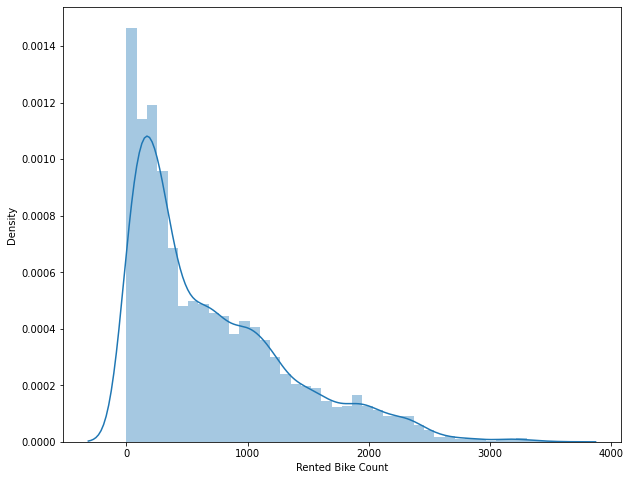

In [43]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Rented Bike Count'])
plt.xlabel('Rented Bike Count')
plt.show()

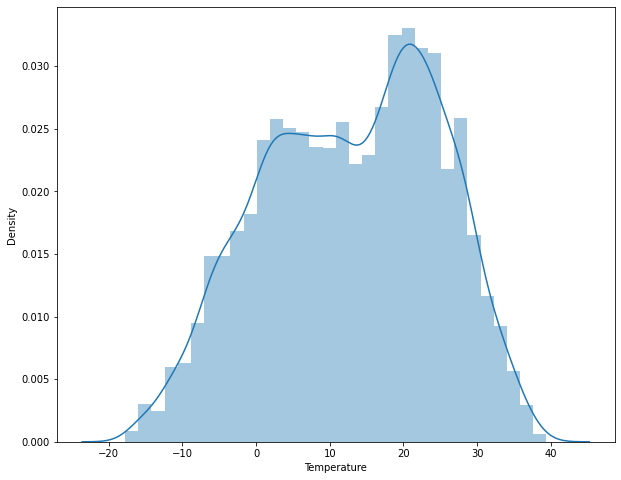

In [44]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Temperature'])
plt.xlabel('Temperature')
plt.show()

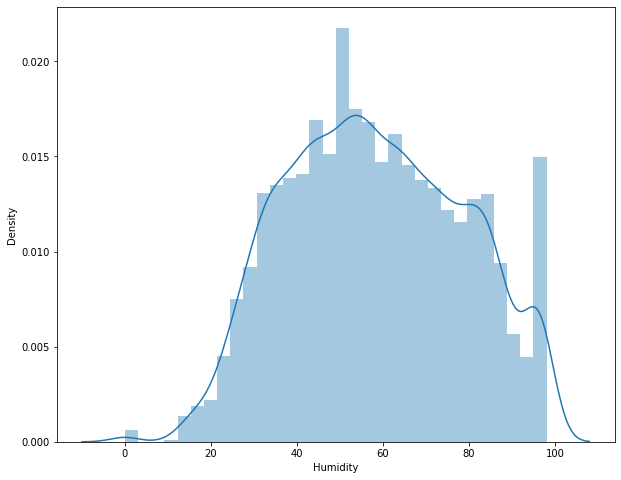

In [45]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Humidity'])
plt.xlabel('Humidity')
plt.show()

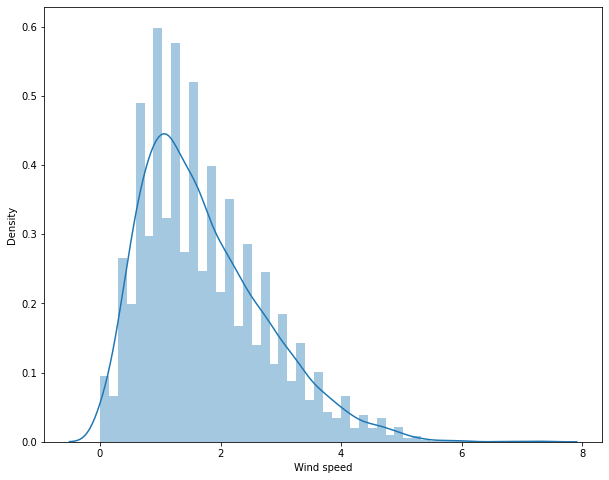

In [46]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Wind speed'])
plt.xlabel('Wind speed')
plt.show()

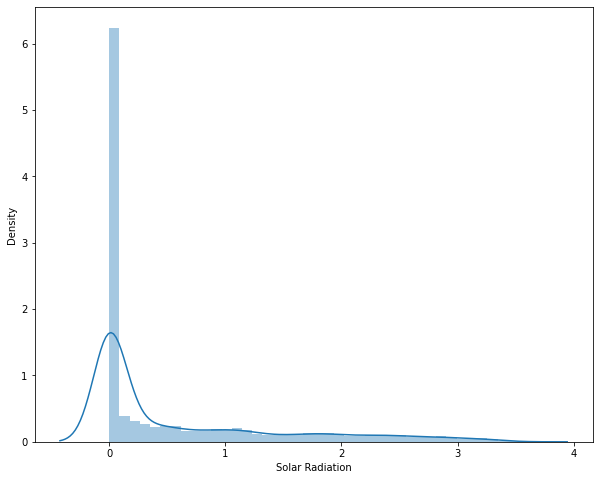

In [47]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Solar Radiation'])
plt.xlabel('Solar Radiation')
plt.show()

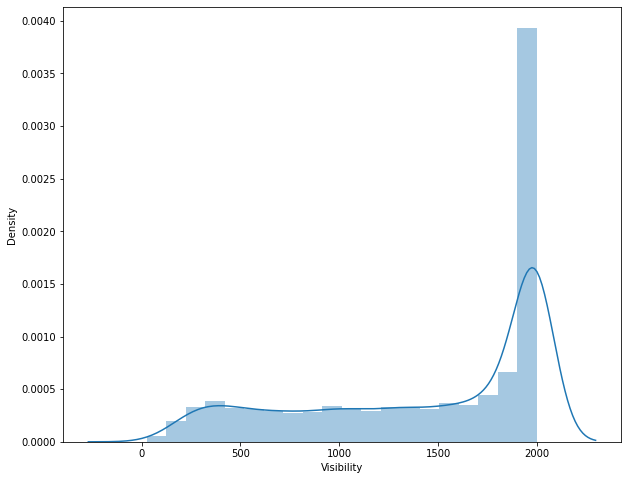

In [48]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Visibility'])
plt.xlabel('Visibility')
plt.show()

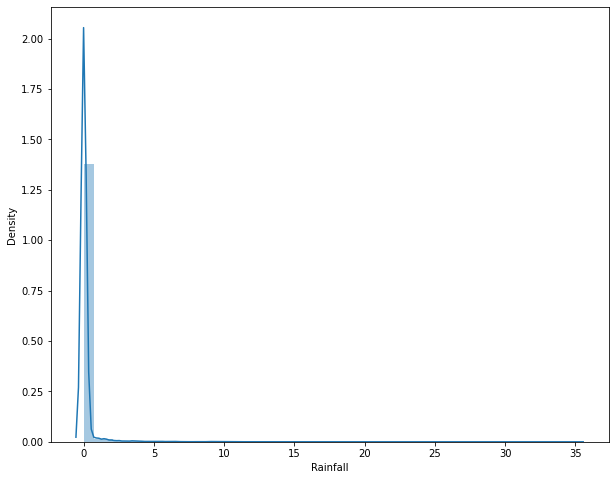

In [49]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(x=seoul_bike_df['Rainfall'])
plt.xlabel('Rainfall')
plt.show()

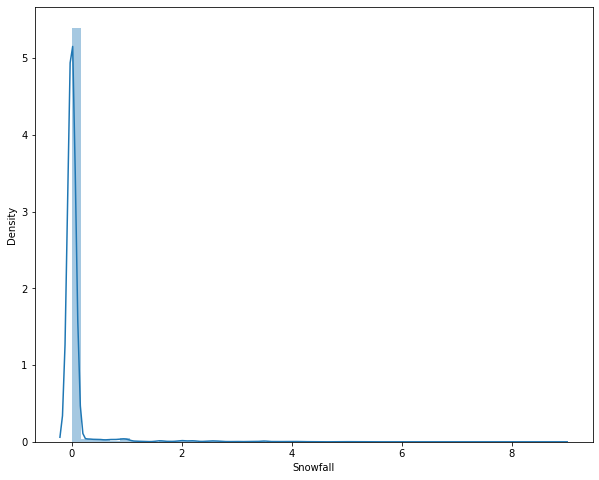

In [50]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(seoul_bike_df['Snowfall'])
plt.xlabel('Snowfall')
plt.show()

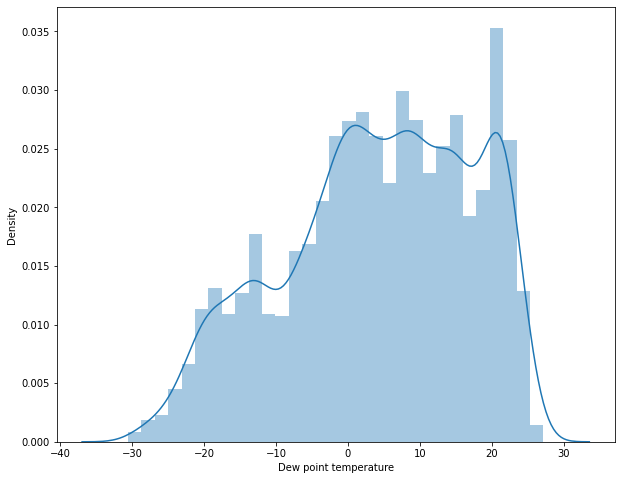

In [51]:
# Visalisation of numerical features using displots
plt.figure(figsize=(10,8))
sns.distplot(seoul_bike_df['Dew point temperature'])
plt.xlabel('Dew point temperature')
plt.show()

### **Assumption of regression line**

1. The relation between the dependent and independent variables should be almost linear. 
2. Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best ﬁt”. 
3. There should be homoscedasticity or equal variance in a regression model. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). 
4. There should not be multicollinearity in regression model. Multicollinearity generally occurs when there are high correlations between two or more independent variables


#### **Let's visualize Regression plot**


The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between two parameters and helps to visualize their linear relationships. Regression plot deals with those kinds of plots in seaborn and shows the ways that can be adapted to change the size, aspect, ratio etc. of such plots.

In [52]:
# Store the numerical data coulmn to a variavle
seoul_bike_num_col = list(seoul_bike_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(seoul_bike_num_col)
numerical_features

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

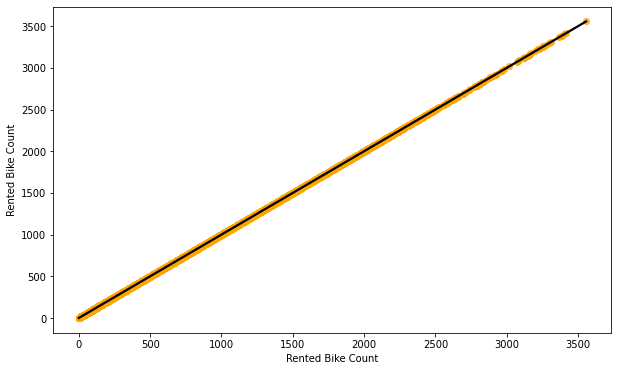

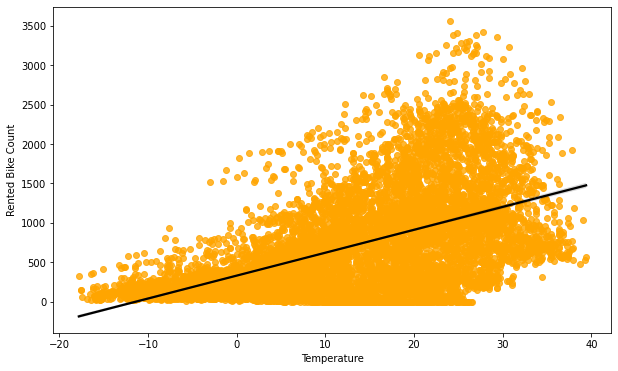

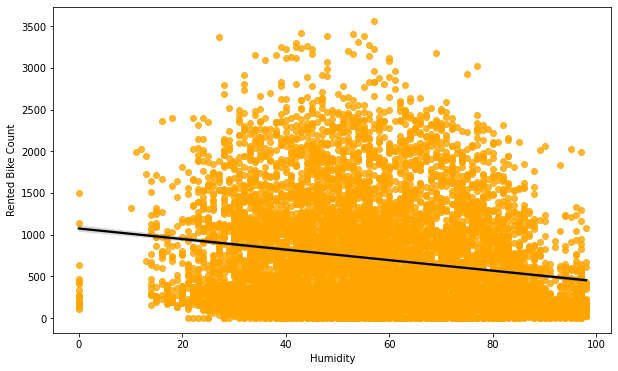

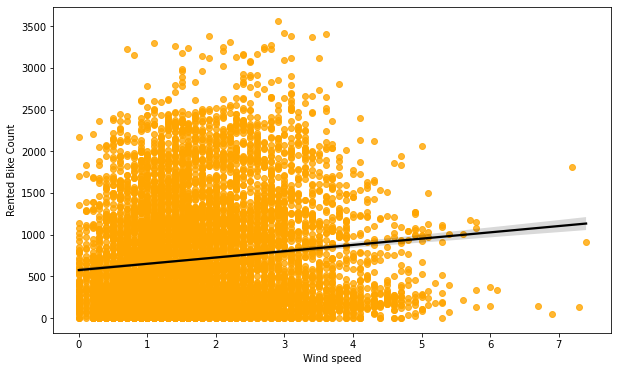

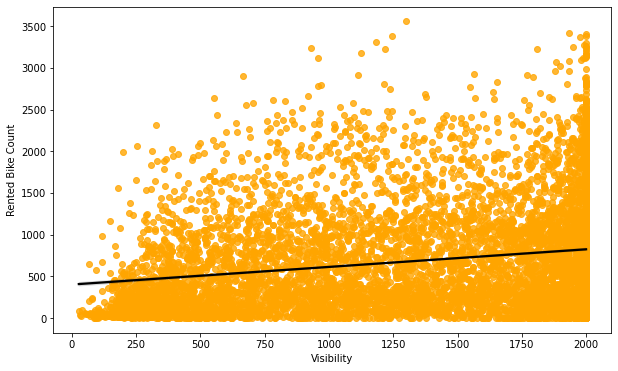

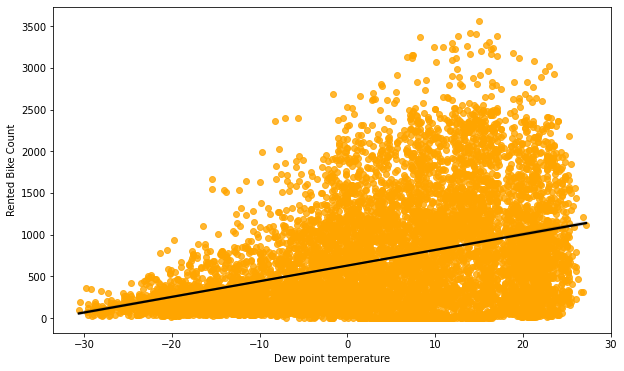

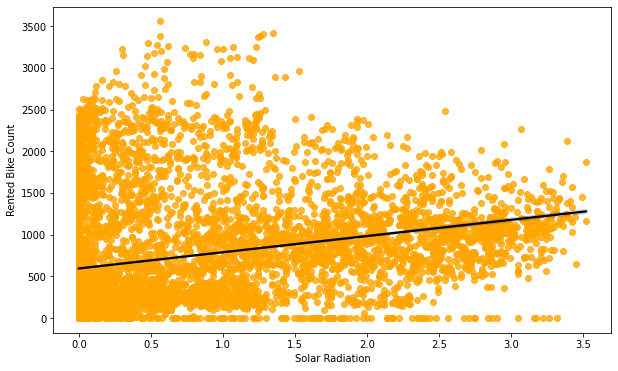

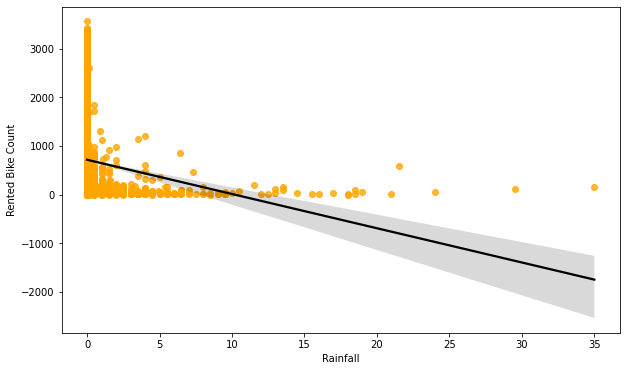

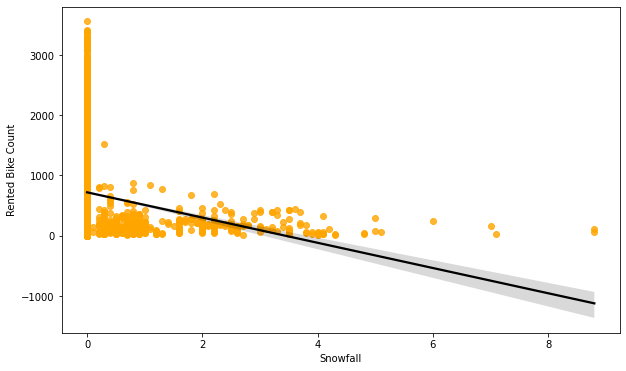

In [53]:
# Let's visualise regression plot for all the numerical features
for col in seoul_bike_num_col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=seoul_bike_df[col],y=seoul_bike_df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* When we see above regression plot, all  features having *int* data type like  'Temperature', 'Wind speed', 'Visibility',
 'Dew point temperature', 'Solar Radiation' are positively related to the dependent variable.
* That means when these features increases the demand for rented bikes increases as well.
* While on the other hand some features like 'Rainfall','Snowfall','Humidity'  are negatively related to the dependent variable which means when these features increase the demand for rented bikes decreases.



## <b> Data Normalization </b>

* Data normalization is the organization of data to appear similar across all records and fields. It increases the cohesion of entry types leading to cleansing, lead generation, segmentation, and higher quality data.
* The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.
* It dramatically improves model accuracy. Normalization gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

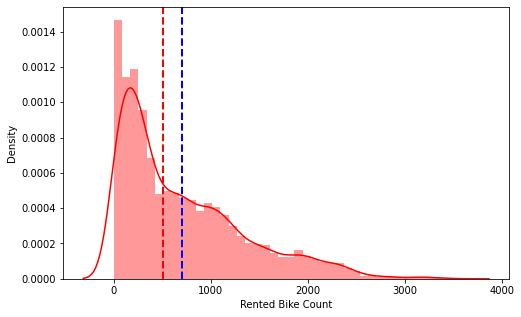

In [54]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(8,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(seoul_bike_df['Rented Bike Count'],hist=True ,color="r")
ax.axvline(seoul_bike_df['Rented Bike Count'].mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(seoul_bike_df['Rented Bike Count'].median(), color='red', linestyle='dashed', linewidth=2)
plt.show()


* From the above graph we can see that the Rented Bike Count has a right skewed. 
* According to the linear regression assumption
 'The distribution of dependent variables should be normal.
* Let's check the outliers and make the dependent variable normal by performing some operation.

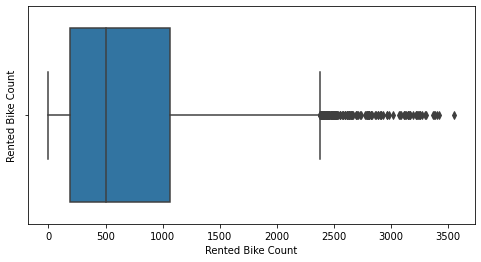

In [55]:
# To check outliers Let's Plot Boxplot for Rented Bike Count 
plt.figure(figsize=(8,4))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=seoul_bike_df['Rented Bike Count'])
plt.show()

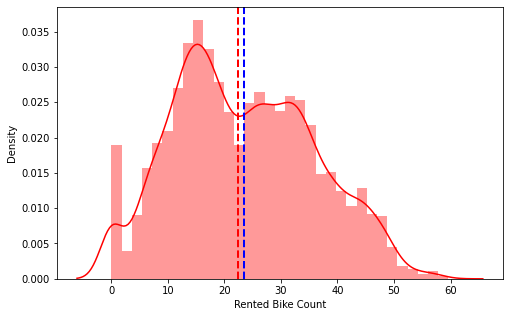

In [56]:
# Apply square root on the Rented Bike Count in order to improve its skewness
plt.figure(figsize=(8,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(seoul_bike_df['Rented Bike Count']), color="r")
ax.axvline(np.sqrt(seoul_bike_df['Rented Bike Count']).mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(seoul_bike_df['Rented Bike Count']).median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

* We applied Square root to make the dependent variable normal.
* By doing so we get almost normal distribution.
* Now let's check for the outliers also-


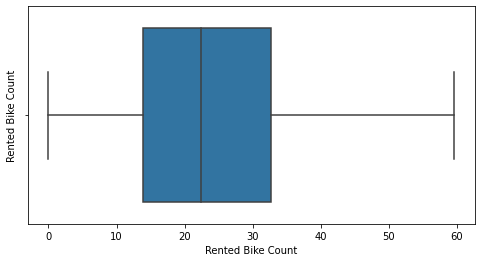

In [57]:
# After applying Square root on Rented Bike Count recheck for outliers 
plt.figure(figsize=(8,4))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(seoul_bike_df['Rented Bike Count']))
plt.show()

* There is no outliers seen now

### <b> Let's visualise the correlation by Heat Map </b>

* In order to reduce multicollinearity,  we need check correlation between variables using Correlation heat map.

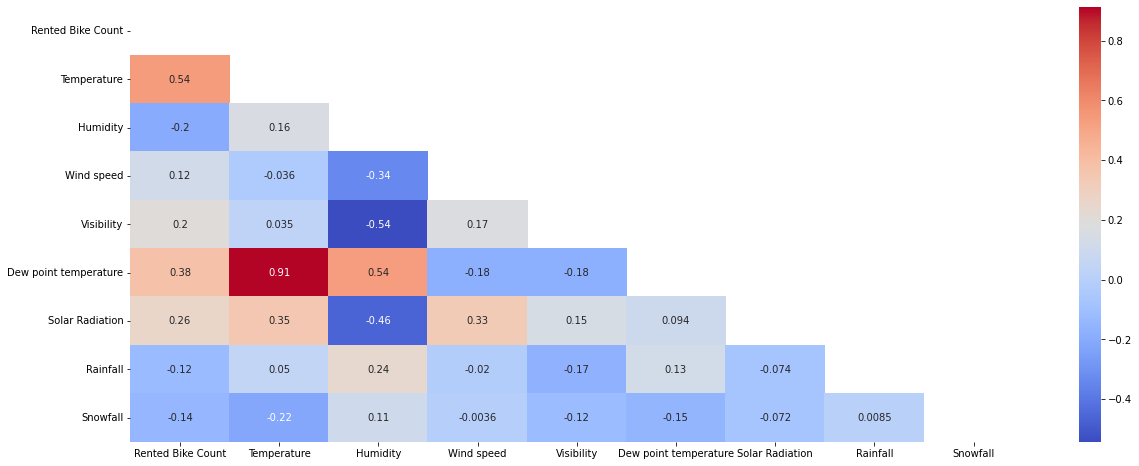

In [58]:
# plot the Correlation matrix
plt.figure(figsize=(20,8))
corre_seoul_bike_df = seoul_bike_df.corr()
mask = np.triu(np.ones_like(corre_seoul_bike_df, dtype=bool))
sns.heatmap((corre_seoul_bike_df),mask=mask, annot=True,cmap='coolwarm')

* Correlation heat map represents that columns 'Temperature' and 'Dew point temperature' is highly correlated i.e. 0.91 
so by dropping this column won't affect the end results
* So let's drop the 'Dew point temperature(°C)' column 


In [59]:
# As mentioned above now Drop the column
seoul_bike_df = seoul_bike_df.drop(['Dew point temperature'],axis=1)

In [60]:
# Let's check the information
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented Bike Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  Weekend            8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


* Our dataset has categorical values. So by creating dummy variables we will be able to use those categorical value for 
programming efficiently

In [61]:
# Store all catagoriacla features in a variable
seoul_bike_categorical_col= list(seoul_bike_df.select_dtypes(['object','category']).columns)
seoul_bike_categorical_col = pd.Index(seoul_bike_categorical_col)
seoul_bike_categorical_col

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'Weekend'], dtype='object')

* **One hot encoding** permits the representation of categorical information to be more expressive.
* Many ML model can't work with it straightforwardly.
* So the categorical information should be changed into numbers.

In [62]:
# For this let's creat a copy
seoul_bike_df_copy = seoul_bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in seoul_bike_categorical_col:
    seoul_bike_df_copy = one_hot_encoding(seoul_bike_df_copy, col)
seoul_bike_df_copy.head()     

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
seoul_bike_df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'Weekend_1'],
      dtype='object')

### **Now Let's train the test split**

In [64]:
# Assign the value in X and Y
# Our dependent variable is 'Rented Bike Count' so drop it from seoul_bike_df_copy
# X : Independent variable
# y : Target or Dependent variable

X = seoul_bike_df_copy.drop(columns=['Rented Bike Count'], axis=1)

# To make the dependent variable normally distributed apply np.sqrt
y = np.sqrt(seoul_bike_df_copy['Rented Bike Count'])

In [65]:
X.head()

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

* The train_test_split() method is used to split our data into train and test sets. First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model.

* test_size is the number that defines the size of the test set. It's very similar to train_size . You should provide either train_size or test_size . If neither is given, then the default share of the dataset that will be used for testing is 0.25 , or 25 percent.

* The random state is simply the lot number of the set generated randomly in any operation. We can specify this lot number whenever we want the same set again.

* Train test split is a model validation procedure that reveals how your model performs on new data.

* After the model is built, if we see that the difference in the values of the predicted and actual data is not much, it is considered to be a good model and can be used to make future predictions. 
Few metric tools we can use to calculate error in the model 
1. MSE (Mean Squared Error) 
2. RMSE (Root Mean Squared Error) 
3. MAE (Mean Absolute Error) 
4. MAPE (Mean Absolute Percentage Error) 
5. R2 (R – Squared) 
6. Adjusted R2 

* X_train : Traing data of our dataset having independent variables or features.
* X_test : Test data of our dataset having independent variables or features.

* y_train : Actual y of training data
* y_test : Actual y of testing data

* test_size = 0.25 : We have splited out data set into 75% for traing the model and 25% for testing
                   

In [67]:
# Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)                      

In [68]:
X_train

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_1
8639,3.8,83,1.1,390,0.00,0.0,0.4,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3614,24.0,47,2.3,520,2.87,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1387,-7.1,33,2.0,1887,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3900,12.3,97,0.8,238,0.14,2.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8044,3.6,70,0.8,1934,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,17.8,75,1.0,1210,0.00,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7891,16.4,47,1.0,1694,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4859,25.5,57,1.8,943,3.01,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3264,8.3,59,2.1,1912,0.00,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [69]:
X_test

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_1
4059,10.7,73,1.3,2000,0.00,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6914,21.7,78,1.0,2000,0.00,0.0,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
233,3.6,65,4.3,1061,0.03,0.0,0.4,0,0,0,...,0,0,0,0,0,0,0,0,1,1
982,-9.7,51,2.8,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5967,33.6,58,3.6,1448,1.98,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-1.5,81,1.8,751,0.00,0.0,2.2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4732,16.9,63,1.0,2000,0.00,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4958,32.3,35,1.8,982,2.71,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8244,13.9,50,4.1,1964,2.14,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
y_train

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented Bike Count, Length: 6570, dtype: float64

In [71]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented Bike Count, Length: 2190, dtype: float64

### <font color = 'blue'> **LINEAR REGRESSION**

In [155]:
# Let's Import the packages
from sklearn.linear_model import LinearRegression
reggression = LinearRegression().fit(X_train, y_train)

In [156]:
# Let's check the intercept 
reggression.intercept_

-6.3416687312300155

In [157]:
# Let's check the coefficeint
reggression.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [158]:
# Let's check the score
reggression.score(X_train, y_train)

0.7722101548255267

1. When we **predict X_train** 
* * we will get **predicted y** for training data (**y_predicton_on_train**).
* * Our **actual y**  for training data will be  **y_train**
* * We will calculte errors using y actual and y predicted
* * * ie **y_train** and **y_predicton_on_train**


2. When we **predict X_test** 
* * we will get **predicted y** for test data (**y_predicton_on_test**). 
* * Our **actual y**  for test data will be  **y_test**
* * We will calculte errors using y actual and y predicted 
* * * ie **y_test** and **y_predicton_on_test**


In [159]:
# Let's check the predicted y for train and test data
y_predicton_on_train = reggression.predict(X_train)
y_predicton_on_test = reggression.predict(X_test)

In [160]:
from sklearn.metrics import mean_squared_error

# Let's check MSE
MSE_LR = mean_squared_error((y_train), (y_predicton_on_train))
print("MSE :",MSE_LR)

# Let's check RMSE
RMSE_LR=np.sqrt(MSE_LR)
print("RMSE :",RMSE_LR)

# Let's check MAE
MAE_LR= mean_absolute_error(y_train, y_predicton_on_train)
print("MAE :",MAE_LR)

# Let's Import the packages
from sklearn.metrics import r2_score
# Let's check r2 
r2_LR= r2_score(y_train, y_predicton_on_train)
print("R2 :",r2_LR)

# Let's check adjusted r2
Adjusted_R2_LR = (1-(1-r2_score(y_train, y_predicton_on_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_predicton_on_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


* r2 score is 0.77 which addresses our model can get the majority of the data variance. 
* Save these evaluated metrics in pandas dataframe for further comparison.


* Store the train and test set metrices value in a dataframe for later comparison


In [161]:
# Store the traing set evaluation metrices values in a dataframe for later comparison
eval_metrics_train = { 'Model':'Linear Regression ', 'MAE':round((MAE_LR),3), 'MSE':round((MSE_LR),3),'RMSE':round((RMSE_LR),3), 
                       'R2_score':round((r2_LR),3),  'Adjusted R2':round((Adjusted_R2_LR ),2) }
model_eval_on_train = pd.DataFrame(eval_metrics_train,index=[1])

In [162]:
from sklearn.metrics import mean_squared_error

# Let's Calculate the MSE
MSE_LR= mean_squared_error(y_test, y_predicton_on_test)
print("MSE :",MSE_LR)

# Let's Calculate the RMSE
RMSE_LR=np.sqrt(MSE_LR)
print("RMSE :",RMSE_LR)

# Let's Calculate the MAE
MAE_LR= mean_absolute_error(y_test, y_predicton_on_test)
print("MAE :",MAE_LR)

# Let's Import the packages
from sklearn.metrics import r2_score
# Let's Calculate the r2 
r2_LR= r2_score((y_test), (y_predicton_on_test))
print("R2 :",r2_LR)

# Let's Calculate the adjusted r2
Adjusted_R2_LR = (1-(1-r2_score((y_test), (y_predicton_on_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_LR )


MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318181
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


* The r2_score for the test data is 0.78. This means our linear model is  performing well on the data. 
* Save these evaluated metrics in pandas dataframe for further comparison.


In [163]:
# Storing the test set metrics value in a dataframe for later comparison
eval_metrics_test ={'Model':'Linear regression ', 'MAE':round((MAE_LR),3), 'MSE':round((MSE_LR),3), 'RMSE':round((RMSE_LR),3),
                    'R2_score':round((r2_LR),3),  'Adjusted R2':round((Adjusted_R2_LR ),2) }
                    
model_eval_on_test =pd.DataFrame(eval_metrics_test,index=[1])

Let's Plot the between predicted and actual daat

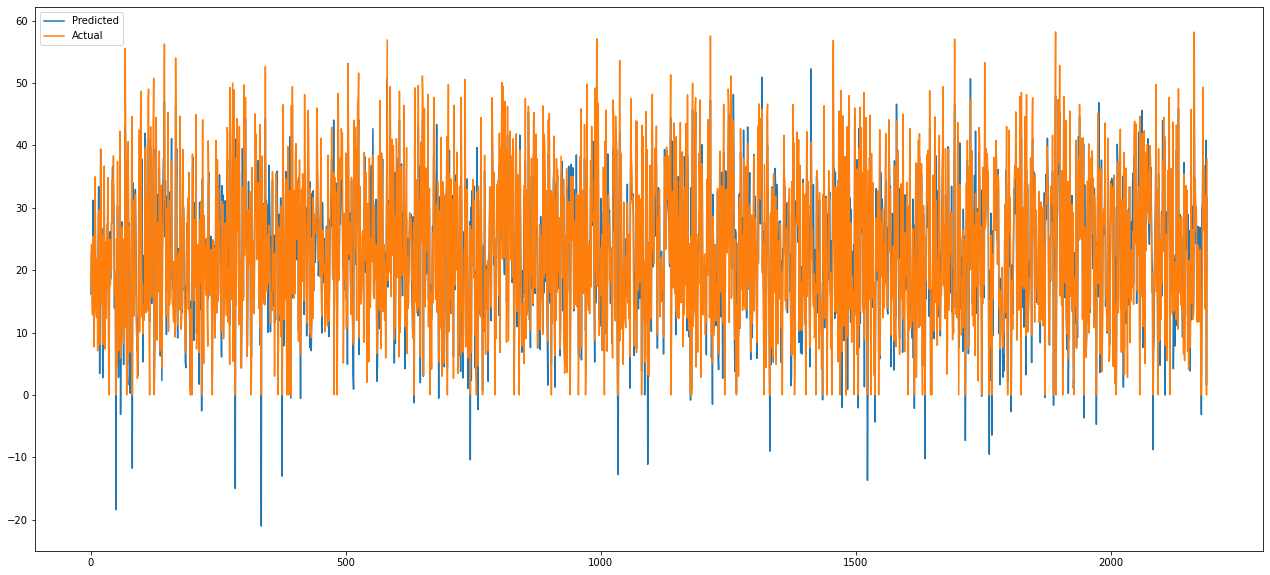

In [164]:
# Plot the figure
plt.figure(figsize=(22,10))
plt.plot(y_predicton_on_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).

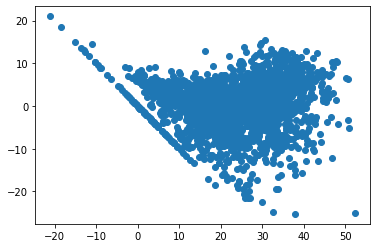

In [165]:
# Heteroscadacity
plt.scatter((y_predicton_on_test),(y_test)-(y_predicton_on_test))

### <font color = 'blue'>  **LASSO REGRESSION**

In [167]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=3000)                
# Fit the Lasso model
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7473037178309577 0.7306322353334551


In [168]:
# Get the X_train and X-test prediction value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [169]:
from sklearn.metrics import mean_squared_error
# Let's Calculate the MSE
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)

# Let's Calculate the RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)


# Let's Calculate the MAE
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso)


from sklearn.metrics import r2_score
# Let's Calculate the r2 
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_lasso)

# Let's Calculate the adjusted r2
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 41.48012492751929
RMSE : 6.440506573827815
MAE : 4.960430531038622
R2 : 0.7306322353334551
Adjusted R2 : 0.7247217381629008


* r2 score value is 0.73 which shows the model is capturing fair amount of the data variance. 
* Let's save it also in a dataframe for further comparisons.


In [170]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_train ={'Model':'Lasso Regression ', 'MAE':round((MAE_lasso),3), 'MSE':round((MSE_lasso),3),
                     'RMSE':round((RMSE_lasso),3), 'R2_score':round((r2_lasso),3), 'Adjusted R2':round((Adjusted_R2_lasso ),2) }
                     
model_eval_on_train = model_eval_on_train.append(eval_metrics_train, ignore_index=True)

In [171]:
from sklearn.metrics import mean_squared_error
# Let's Calculate the MSE
MSE_lasso= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso)

# Let's Calculate the RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)


# Let's Calculate the MAE
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)


from sklearn.metrics import r2_score
# Let's Calculate the r2 
r2_lasso= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_lasso)

# Let's Calculate adjusted r2
Adjusted_R2_lasso=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 39.91752283290745
RMSE : 6.318031563145871
MAE : 4.91263385826569
R2 : 0.7473037178309577
Adjusted R2 : 0.7417590281661841


* The r2_score for the test set is 0.74. 
* This means our linear model is performing well on the data. 


In [172]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_test={'Model':'Lasso regression ', 'MAE':round((MAE_lasso),3), 'MSE':round((MSE_lasso),3), 'RMSE':round((RMSE_lasso),3),
                   'R2_score':round((r2_lasso),3), 'Adjusted R2':round((Adjusted_R2_lasso ),2), }

model_eval_on_test = model_eval_on_test.append(eval_metrics_test, ignore_index=True)

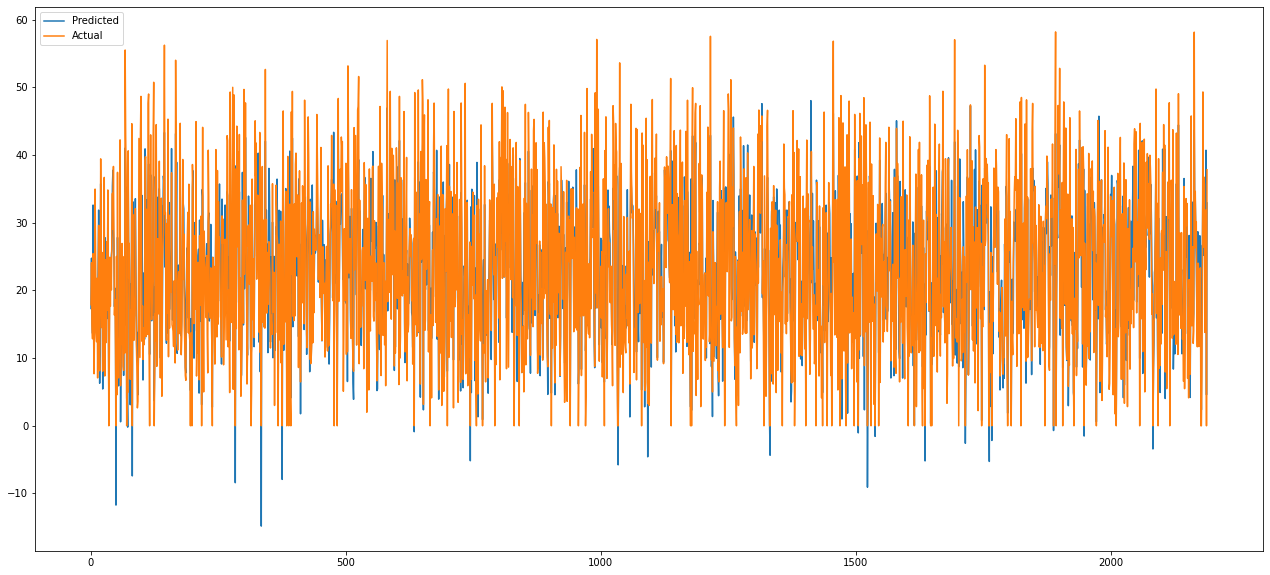

In [173]:
# Plot the figure between predicted and actual
plt.figure(figsize=(22,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

* Let's check for heteroscedasticity.

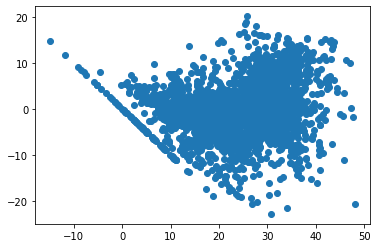

In [174]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

### <font color = 'blue'> **RIDGE REGRESSION**

In [175]:
# Let's Import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [176]:
# Fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [177]:
#check the score
ridge.score(X_train, y_train)

0.7722100789802107

In [178]:
# Get the X_train and X-test value
y_prediction_on_train_ridge = ridge.predict(X_train)
y_prediction_test_ridge = ridge.predict(X_test)

In [179]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error
# Let's check the vale of MSE
MSE_ridge = mean_squared_error((y_train), (y_prediction_on_train_ridge))
print("MSE :",MSE_ridge)

# Let's check the vale of RMSE
RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)


# Let's check the vale of MAE
MAE_ridge = mean_absolute_error(y_train, y_prediction_on_train_ridge)
print("MAE :",MAE_ridge)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's check the vale of r2
r2_ridge = r2_score(y_train, y_prediction_on_train_ridge)
print("R2 :",r2_ridge)

# Let's check the vale of adjusted r2
Adjusted_R2_ridge = (1-(1-r2_score(y_train, y_prediction_on_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_prediction_on_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


* Here our r2 score value is 0.77 that means our model has captured most of the data variance.
* Let's save it also in a dataframe for further comparisons.


In [180]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_train={'Model':'Ridge regression ', 'MAE':round((MAE_ridge),3), 'MSE':round((MSE_ridge),3), 'RMSE':round((RMSE_ridge),3),
                    'R2_score':round((r2_ridge),3), 'Adjusted R2':round((Adjusted_R2_ridge ),2)}
                    
model_eval_on_train=model_eval_on_train.append(eval_metrics_train,ignore_index=True)

In [181]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error

# Let's check the vale of MSE
MSE_ridge= mean_squared_error(y_test, y_prediction_test_ridge)
print("MSE :",MSE_ridge)

# Let's check the vale of RMSE
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)


# Let's check the vale of MAE
MAE_ridge= mean_absolute_error(y_test, y_prediction_test_ridge)
print("MAE :",MAE_ridge)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's check the vale of r2 
r2_ridge= r2_score((y_test), (y_prediction_test_ridge))
print("R2 :",r2_ridge)

# Let's check the vale of adjusted r2
Adjusted_R2_ridge=(1-(1-r2_score((y_test), (y_prediction_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_prediction_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


* The r2_score for the test data here is 0.78. This means our linear model is  performing well on the data. 



In [182]:
# Storing the test set metrics value in a dataframe for later comparison
eval_metrics_test={'Model':'Ridge regression ','MAE':round((MAE_ridge),3),'MSE':round((MSE_ridge),3),'RMSE':round((RMSE_ridge),3),
                    'R2_score':round((r2_ridge),3), 'Adjusted R2':round((Adjusted_R2_ridge ),2)}
                    
model_eval_on_test=model_eval_on_test.append(eval_metrics_test,ignore_index=True)

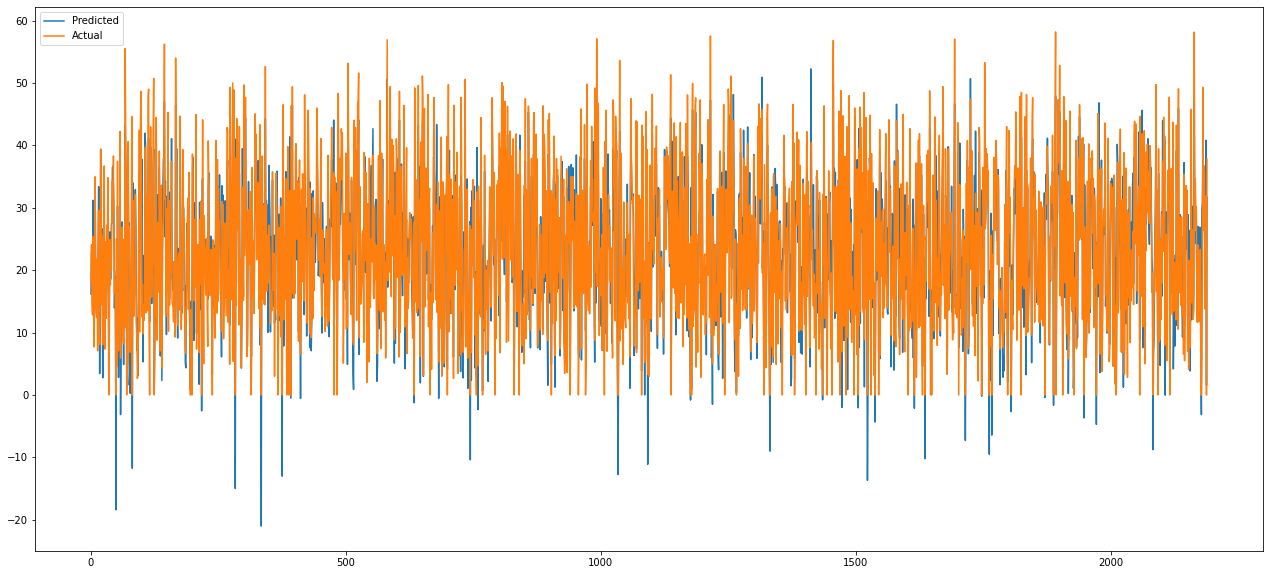

In [183]:
# Plot the figure
plt.figure(figsize=(22,10))
plt.plot((y_prediction_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

* Let's check for heteroscedasticity.

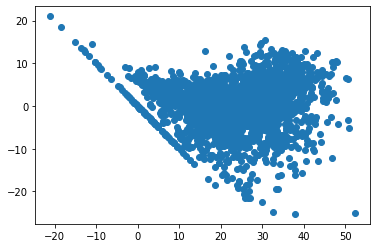

In [184]:
# Heteroscadacity
plt.scatter((y_prediction_test_ridge),(y_test)-(y_prediction_test_ridge))

### <font color = 'blue'> **ELASTIC NET REGRESSION**

In [185]:
# Let's Import the packages
from sklearn.linear_model import ElasticNet

#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)

elas_net = ElasticNet(alpha=0.01, l1_ratio=0.5)                  

In [186]:
# FIT THE MODEL
elas_net.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [187]:
# Let's check the score
elas_net.score(X_train, y_train)

0.7650024141754607

In [188]:
# Get the X_train and X-test value
y_pred_train_elas_net = elas_net.predict(X_train)
y_pred_test_elas_net = elas_net.predict(X_test)

In [189]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error

# Let's check the vale of MSE
MSE_elas_net= mean_squared_error((y_train), (y_pred_train_elas_net))
print("MSE :",MSE_elas_net)

# Let's check the vale of RMSE
RMSE_elas_net=np.sqrt(MSE_elas_net)
print("RMSE :",RMSE_elas_net)


# Let's check the vale of MAE
MAE_elas_net = mean_absolute_error(y_train, y_pred_train_elas_net)
print("MAE :",MAE_elas_net)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's check the vale of r2 
r2_elas_net= r2_score(y_train, y_pred_train_elas_net)
print("R2 :",r2_elas_net)

# Let's check the vale of adjusted r2
Adjusted_R2_elas_net=(1-(1-r2_score(y_train, y_pred_train_elas_net))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_elas_net))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 36.187437757202375
RMSE : 6.015599534310971
MAE : 4.571576500667136
R2 : 0.7650024141754607
Adjusted R2 : 0.7598460712558746


* Here r2 score value is 0.76 that means our model is  able to capture most of the data variance. 
* Let's save it in a dataframe for later comparisons

In [190]:
# Storing the test set metrics value in a dataframe for later comparison
eval_metrics_train={'Model':'Elastic net regression ','MAE':round((MAE_elas_net),3),'MSE':round((MSE_elas_net),3), 'RMSE':round((RMSE_elas_net),3),
                     'R2_score':round((r2_elas_net),3), 'Adjusted R2':round((Adjusted_R2_elas_net ),2)}

model_eval_on_train=model_eval_on_train.append(eval_metrics_train,ignore_index=True)

In [191]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error

# Let's check the vale of MSE
MSE_elas_net= mean_squared_error(y_test, y_pred_test_elas_net)
print("MSE :",MSE_elas_net)

# Let's check the vale of RMSE
RMSE_elas_net=np.sqrt(MSE_elas_net)
print("RMSE :",RMSE_elas_net)


# Let's check the vale of MAE
MAE_elas_net= mean_absolute_error(y_test, y_pred_test_elas_net)
print("MAE :",MAE_elas_net)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's check the vale of r2 
r2_elas_net= r2_score((y_test), (y_pred_test_elas_net))
print("R2 :",r2_elas_net)

#  Check the vale of adjusted r2
Adjusted_R2_elas_net=(1-(1-r2_score((y_test), (y_pred_test_elas_net)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_elas_net)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 34.89545760684734
RMSE : 5.907237730686597
MAE : 4.550377877058056
R2 : 0.779095700934419
Adjusted R2 : 0.7742485944656599


* Here r2 score value is 0.77 that means our model is  able to capture most of the data variance. 
* Let's save it in a dataframe for later comparisons

In [192]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_test={'Model':'Elastic net regression Test','MAE':round((MAE_elas_net),3),'MSE':round((MSE_elas_net),3),'RMSE':round((RMSE_elas_net),3),
                   'R2_score':round((r2_elas_net),3),   'Adjusted R2':round((Adjusted_R2_elas_net ),2)}

model_eval_on_test=model_eval_on_test.append(eval_metrics_test,ignore_index=True)

Let's Plot the figure between Predicted and actual

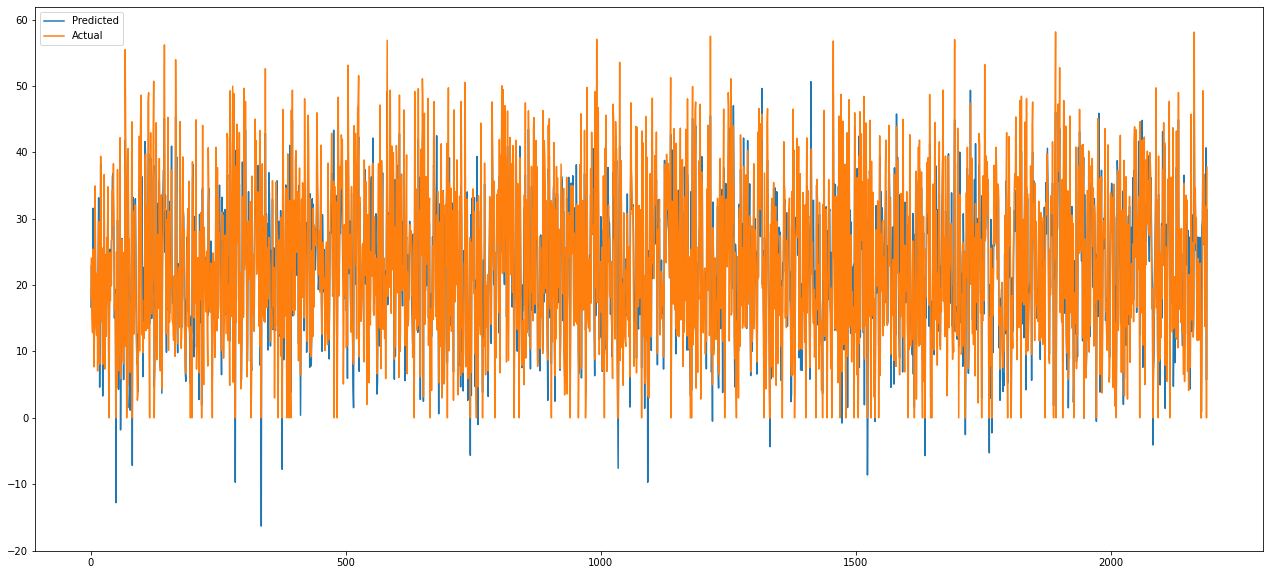

In [113]:
# Plot the figure
plt.figure(figsize=(22,10))
plt.plot(np.array(y_pred_test_elas_net))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

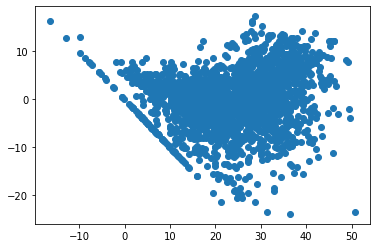

In [111]:
# Heteroscadacity
plt.scatter((y_pred_test_elas_net),(y_test)-(y_pred_test_elas_net))

### <font color = 'blue'> **DECISION TREES**

**Decision Tree Regression**:

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.


Discrete output example:  A weather prediction model that predicts whether or not there’ll be rain on a particular day. 


Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.
Here, continuous values are predicted with the help of a decision tree regression model.

In [193]:
# Let's Import the package
from sklearn.tree import DecisionTreeRegressor
deci_tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100,)
deci_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [194]:
# Get the X_train and X-test value
y_pred_train_dt = deci_tree_reg.predict(X_train)
y_pred_test_dt = deci_tree_reg.predict(X_test)

In [195]:
# Let's Import the package
from sklearn.metrics import mean_squared_error
print("Model Score:",deci_tree_reg.score(X_train,y_train))

# Let's Calculate the MSE
MSE_dt= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE_dt)

# Let's Calculate the RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)


# Let's Calculate the MAE
MAE_dt= mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",MAE_dt)


# Let's Import the packages
from sklearn.metrics import r2_score

# Let's Calculate the r2 
r2_dt= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2_dt)

# Let's Calculate the adjusted r2
Adjusted_R2_dt=(1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6624939557028167
MSE : 51.972784860024426
RMSE : 7.209215273524881
MAE : 5.238193841710909
R2 : 0.6624939557028167
Adjusted R2 : 0.655088360893308


Looks like our r2 score value is 0.66 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [196]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_train={'Model':'Dicision tree regression ', 'MAE':round((MAE_dt),3), 'MSE':round((MSE_dt),3), 'RMSE':round((RMSE_dt),3),
                                                         'R2_score':round((r2_dt),3), 'Adjusted R2':round((Adjusted_R2_dt),2) }
model_eval_on_train = model_eval_on_train.append(eval_metrics_train,ignore_index=True)

In [197]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error

# Let's Calculate the MSE
MSE_dt= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE_dt)

# Let's Calculate the RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)


# Let's Calculate the MAE
MAE_dt= mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",MAE_dt)


# Let's Import the packages
from sklearn.metrics import r2_score

# Let's Calculate the r2 
r2_dt= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2_dt)

# Let's Calculate the adjusted r2
Adjusted_R2_dt=(1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 58.32815297715247
RMSE : 7.637287016811171
MAE : 5.525496840397561
R2 : 0.6307559598622512
Adjusted R2 : 0.6226539664511989


The r2_score for the test set is 0.63. This means our linear model is not performing good on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).




In [198]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_test={'Model':'Dicision tree regression ', 'MAE':round((MAE_dt),3), 'MSE':round((MSE_dt),3), 'RMSE':round((RMSE_dt),3),
                                                        'R2_score':round((r2_dt),3), 'Adjusted R2':round((Adjusted_R2_dt),2) }
model_eval_on_test=model_eval_on_test.append(eval_metrics_test,ignore_index=True)

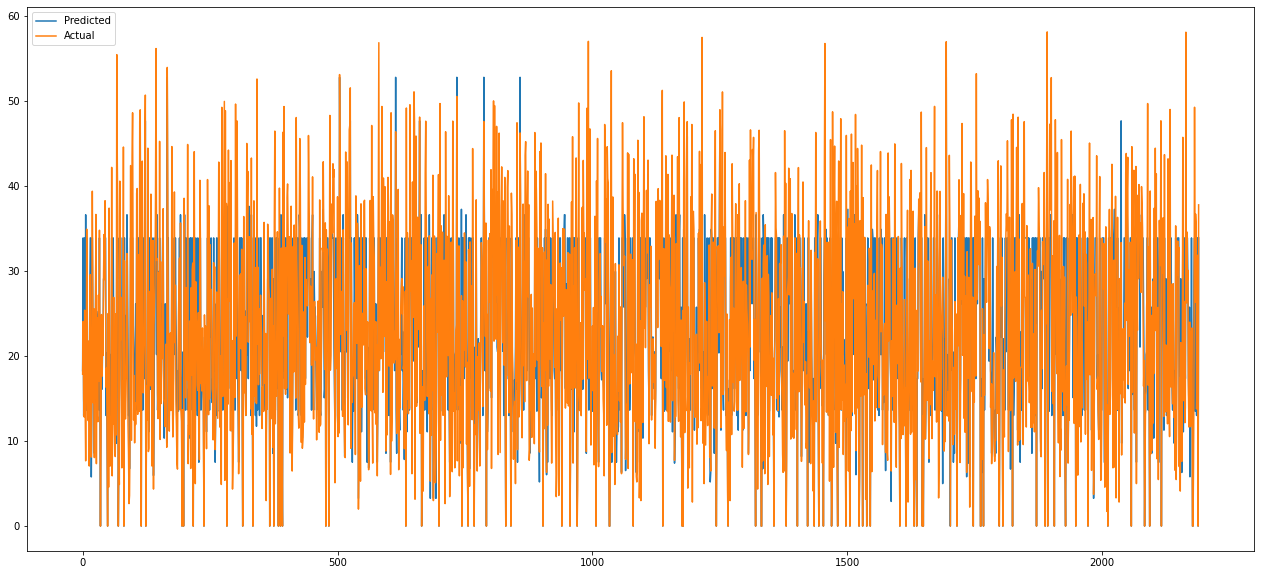

In [121]:
# Plot the figure
plt.figure(figsize=(22,10))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

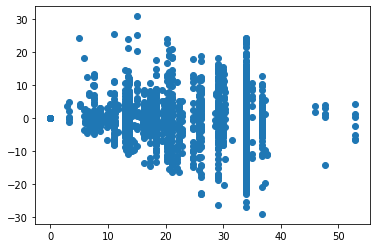

In [122]:
# Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

### <font color = 'blue'> **RANDOM FOREST**

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems

In [199]:
# Let's Import the package
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
random_for = RandomForestRegressor()

random_for.fit(X_train,y_train)

RandomForestRegressor()

In [200]:
# Making predictions on train and test data

y_pred_train_rf = random_for.predict(X_train)
y_pred_test_rf = random_for.predict(X_test)


In [201]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",random_for.score(X_train,y_train))

# Let's Calculate the MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf)

# Let's Calculate the RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# Let's Calculate the MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's Calculate the r2 
r2_rf= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2_rf)

# Let's Calculate the adjusted r2
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9895340023313604
MSE : 1.6116660853005755
RMSE : 1.2695141138642672
MAE : 0.7995415722249986
R2 : 0.9895340023313604
Adjusted R2 : 0.9893043562573987


It seems that our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.



In [202]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_train = {'Model':'Random forest regression ', 'MAE':round((MAE_rf),3), 'MSE':round((MSE_rf),3), 'RMSE':round((RMSE_rf),3),
                                                      'R2_score':round((r2_rf),3),  'Adjusted R2':round((Adjusted_R2_rf ),2)}
model_eval_on_train = model_eval_on_train.append(eval_metrics_train,ignore_index=True)

In [203]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error
# Let's Calculate the MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

# Let's Calculate the RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# Let's Calculate the MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's Calculate the r2 
r2_rf= r2_score((y_test), (y_pred_test_rf))
print("R2 :",r2_rf)

# Let's Calculate the adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.626485560041926
RMSE : 3.5533766420183954
MAE : 2.2086036076326776
R2 : 0.9200685380393056
Adjusted R2 : 0.918314673094323


**Here the r2_score for the test set is 0.92 whichs shows that this model is  performing very well on the data.**




In [204]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_test={'Model':'Random forest regression ', 'MAE':round((MAE_rf),3), 'MSE':round((MSE_rf),3), 'RMSE':round((RMSE_rf),3),
                                                      'R2_score':round((r2_rf),3),'Adjusted R2':round((Adjusted_R2_rf ),2)}
model_eval_on_test=model_eval_on_test.append(eval_metrics_test,ignore_index=True)

Let's visualize the residuals and see if there is heteroscedasticity.

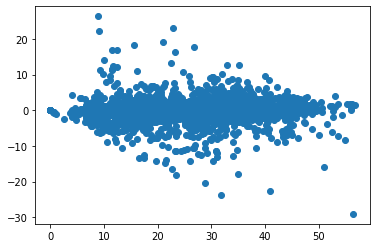

In [129]:
# Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [130]:
# Now Let's see the features importance
importances = random_for.feature_importances_
importances

array([3.11459211e-01, 1.60108766e-01, 1.20720012e-02, 1.17714516e-02,
       3.04160377e-02, 2.98767485e-02, 1.38392022e-03, 4.61971552e-03,
       1.35300828e-02, 2.08110334e-02, 2.97737419e-02, 2.57488267e-02,
       8.00520203e-03, 4.23406269e-03, 1.43762820e-02, 1.02645757e-03,
       2.29115776e-03, 1.15244985e-03, 3.05747656e-04, 2.68750645e-04,
       4.54564915e-04, 1.47755457e-03, 3.61998633e-03, 1.04289105e-02,
       3.14497089e-02, 1.85033453e-02, 1.21802281e-02, 1.22856367e-02,
       9.64069235e-03, 3.91562657e-03, 4.03481221e-03, 9.16482497e-04,
       9.56091609e-03, 4.05954402e-03, 1.53807668e-01, 3.67944254e-04,
       4.03019969e-03, 1.25198082e-03, 1.47961632e-03, 2.40200435e-03,
       5.69773728e-04, 2.01070352e-03, 7.49756886e-04, 2.43479586e-03,
       4.74280279e-03, 7.87553009e-04, 1.96055458e-02])

In [131]:
# Save in a dictionary
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

# create the data farme
importance_df = pd.DataFrame(importance_dict)

In [132]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [133]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
34,Functioning Day_Yes,0.15
10,Hour_4,0.03
4,Solar Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
11,Hour_5,0.03
25,Hour_19,0.02
46,Weekend_1,0.02


* Temperature is the most important feature

In [205]:
# Fit the model
random_for.fit(X_train,y_train)

RandomForestRegressor()

In [206]:
features = X_train.columns
importances = random_for.feature_importances_
indices = np.argsort(importances)

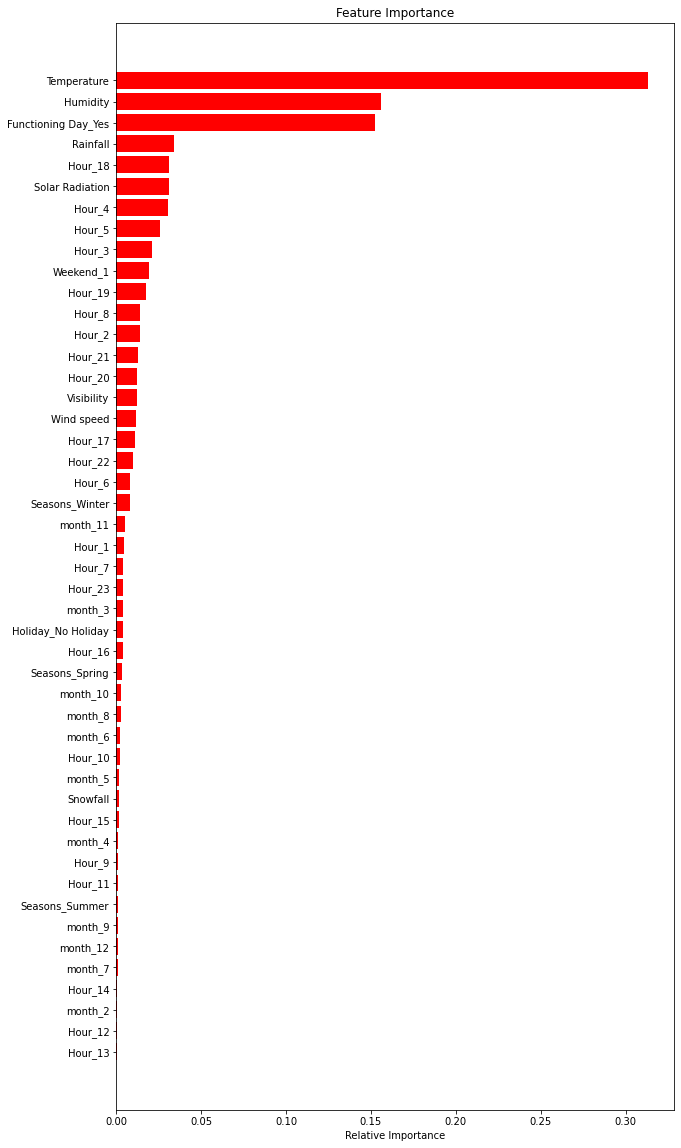

In [207]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### <font color = 'blue'> **GRADIENT BOOSTING**

In [208]:
# Let's Import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gradient_boost = GradientBoostingRegressor()


gradient_boost.fit(X_train,y_train)

GradientBoostingRegressor()

In [209]:
# Predict on train and test data

y_pred_train_gb = gradient_boost.predict(X_train)
y_pred_test_gb = gradient_boost.predict(X_test)


In [210]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gradient_boost.score(X_train,y_train))

# Let's Calculate the MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb)

# Let's Calculate the RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# Let's Calculate the MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb)

# Let's Import the packages
from sklearn.metrics import r2_score

# Let's Calculate the r2 
r2_gb= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2_gb)

# Let's Calculate the adjusted r2
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8789016499095264
MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.2690035692731247
R2 : 0.8789016499095264
Adjusted R2 : 0.8762444965695393


Here r2 score value is 0.87 which is slightly less than the random forest. Our model is captureing most of the data variance. 

Let's save this in a dataframe for later comparisons.

In [211]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_train = {'Model':'Gradient boosting regression ', 'MAE':round((MAE_gb),3), 'MSE':round((MSE_gb),3), 'RMSE':round((RMSE_gb),3),
                                                        'R2_score':round((r2_gb),3), 'Adjusted R2':round((Adjusted_R2_gb ),2), }
model_eval_on_train = model_eval_on_train.append(eval_metrics_train,ignore_index=True)

In [212]:
# Let's Import the packages
from sklearn.metrics import mean_squared_error
# Let's Calculate the MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb)

# Let's Calculate the RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


# Let's Calculate the MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb)


# Let's Import the packages
from sklearn.metrics import r2_score
# Let's Calculate the r2 
r2_gb= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2_gb)

# Let's Calculate the adjusted r2
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.28944184250869
RMSE : 4.6140483138463875
MAE : 3.4928587865599914
R2 : 0.8652280396863458
Adjusted R2 : 0.8622708584843188


The r2_score for the test set is 0.86  means our model is doing well on the test data. 



In [213]:
# storing the test set metrics value in a dataframe for later comparison
eval_metrics_test={'Model':'Gradient boosting regression ', 'MAE':round((MAE_gb),3), 'MSE':round((MSE_gb),3), 'RMSE':round((RMSE_gb),3),
                                                        'R2_score':round((r2_gb),3), 'Adjusted R2':round((Adjusted_R2_gb ),2) }
model_eval_on_test=model_eval_on_test.append(eval_metrics_test,ignore_index=True)

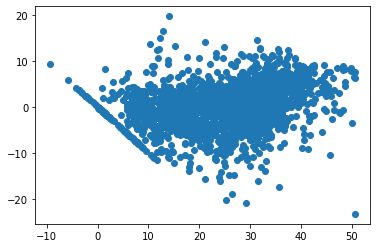

In [144]:
# Heteroscadacity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

In [145]:
# Let's see the feature importace
importances = gradient_boost.feature_importances_
importances

array([3.21570763e-01, 1.28054219e-01, 5.01908892e-04, 4.41033341e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 0.00000000e+00,
       1.72209214e-03, 9.33502112e-05, 2.82254756e-04, 4.18000398e-03,
       0.00000000e+00, 2.53995127e-03, 0.00000000e+00, 6.76468137e-03,
       5.12015005e-03, 2.89720073e-04, 1.79854096e-02])

In [146]:
# Store in dictionary
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [147]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [148]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning Day_Yes,0.17
1,Humidity,0.13
5,Rainfall,0.07
4,Solar Radiation,0.05
32,Seasons_Winter,0.03
24,Hour_18,0.03
10,Hour_4,0.03
11,Hour_5,0.02
27,Hour_21,0.02


In [149]:
# Fit the model
gradient_boost.fit(X_train,y_train)

GradientBoostingRegressor()

In [150]:
features = X_train.columns
importances = gradient_boost.feature_importances_
indices = np.argsort(importances)

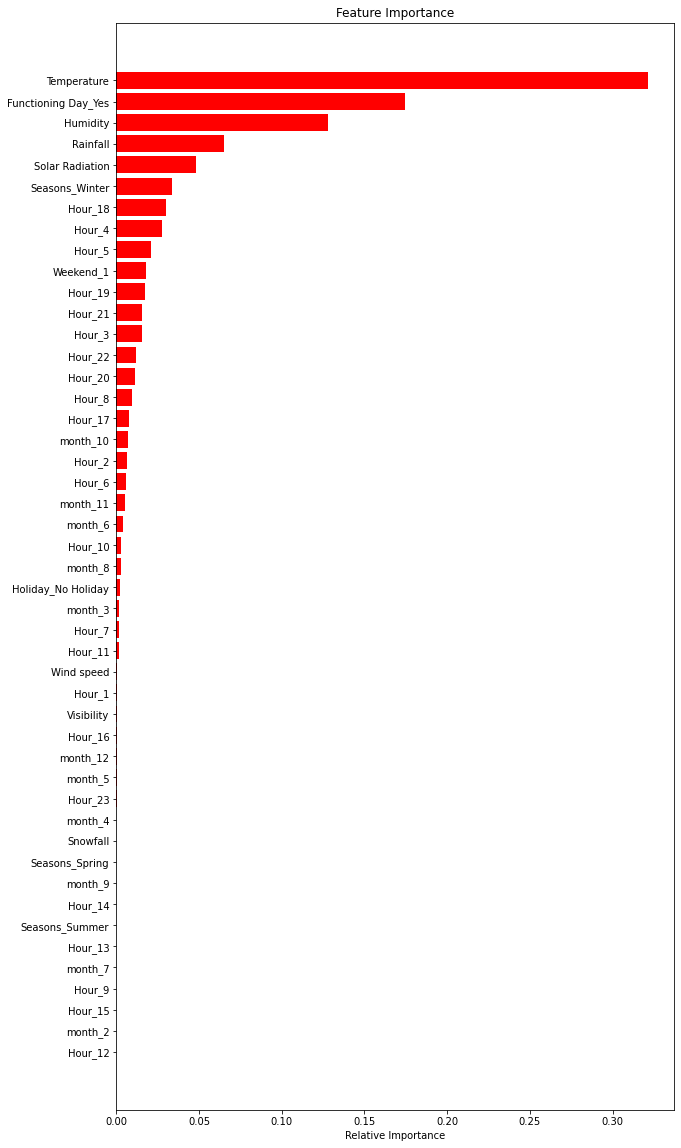

In [151]:
# Now visualise
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##  <font color = 'red'>  **Let's Conclude the effort**

* We have applied ML algorithms such as Linear Regression, lasso, ridge and elasticnet regression, Decision Tree regression, Random Forest and Gradient boosting regression.
* Now it's time to compare all these, let's see:

In [214]:
# Compare the results of train and test evaluation metrices values for all models
all_evaluation_metrices = pd.concat([model_eval_on_train,model_eval_on_test],keys=['Evaluation Metrices of Train Data','Evaluation Metrices of Test Data'])
all_evaluation_metrices

Model    MAE  \
Evaluation Metrices of Train Data 0             Linear Regression   4.474   
                                  1              Lasso Regression   4.960   
                                  2              Ridge regression   4.474   
                                  3        Elastic net regression   4.572   
                                  4      Dicision tree regression   5.238   
                                  5      Random forest regression   0.800   
                                  6  Gradient boosting regression   3.269   
Evaluation Metrices of Test Data  0             Linear regression   4.410   
                                  1              Lasso regression   4.913   
                                  2              Ridge regression   4.410   
                                  3    Elastic net regression Test  4.550   
                                  4      Dicision tree regression   5.525   
                                  5      Random forest regression   2.209   
                                  6  Gradient boosting regression   3.493   

                                        MSE   RMSE  R2_score  Adjusted R2  
Evaluation Metrices of Train Data 0  35.078  5.923     0.772         0.77  
                                  1  41.480  6.441     0.731         0.72  
                                  2  35.078  5.923     0.772         0.77  
                                  3  36.187  6.016     0.765         0.76  
                                  4  51.973  7.209     0.662         0.66  
                                  5   1.612  1.270     0.990         0.99  
                                  6  18.648  4.318     0.879         0.88  
Evaluation Metrices of Test Data  0  33.275  5.768     0.789         0.78  
                                  1  39.918  6.318     0.747         0.74  
                                  2  33.277  5.769     0.789         0.78  
                                  3  34.895  5.907     0.779         0.77  
                                  4  58.328  7.637     0.631         0.62  
                                  5  12.626  3.553     0.920         0.92  
                                  6  21.289  4.614     0.865         0.86

*  Here we can say from the above table that Random forest Regression and Gradient boost regression gives the highest R2 score of 99% and 87% for Training Set and 92% and 86% for Test set respectively.

* Linear and Ridge Regression gives the second highest R2 score of 77% for the Training dataset and 78% for Test dataset.

* Decision tree regression gives the lowest R2 score of 66% for the Training dataset and 63% for Test dataset.


Let's sum up the steps followed here
* At first we did EDA (Exploratory data analysis) on the given data.
* We also analysed our label (Rented Bike Count) and features (Independent variable).
* We transformed the dataset for better analysis purposes. 
* Next we visualise the relationship between labels and features, its distribution and pattern of the data.
* We dropped some features due to not much use for model training and some were highly correlated. 
* After preprocessing the data then we split the data into 75-25 for the train-test.
* Finally we applied ML algorithms and came up with a Regression model.




* Here we can say that our model is optimal fit.
* There is no overfitting

* Random forest Regression and Gradient boost regression gives the highest R2 score of 99% and 87% for Training Set and 92% and 86% for Test set respectively.

* We can deploy this model.


* Before concluding let's discuss some key the point:
* * We know that the temperature, wind speed, rainfall and snowfall will not consistent for every year
* * As the features of the given dataset is not always like every year
* * So there may be a possibility that this model will not perform well.
* * So it need to continuous supervision and modification

